In [1]:
import cv2                                         # working with, mainly resizing, images
import numpy as np                                 # dealing with arrays
import os                                          # dealing with directories
from random import shuffle                         # mixing up or currently ordered data that might lead our network astray in training.
from keras.models import Sequential                # creating sequential model of CNN
from keras.layers import Conv2D             # creating convolution layer
from keras.layers import MaxPooling2D              # creating maxpool layer
from keras.layers import Flatten                   # creating input vector for dense layer
from keras.layers import Dense                     # create dense layer or fully connected layer
from keras.layers import Dropout                    # use to avoid overfitting by droping some parameters
from keras.layers import Activation                   # use to avoid overfitting by droping some parameters
from keras.layers import BatchNormalization                   # use to avoid overfitting by droping some parameters
from keras.preprocessing import image              # generate image
import matplotlib.pyplot as plt                    # use for visualization
import warnings#
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from keras.constraints import maxnorm
warnings.filterwarnings('ignore')
import os
import pandas as pd
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [14]:
TRAIN_DIR = 'dataset/train'
TEST_DIR = 'dataset/val'
IMG_SIZE = 64,64

In [15]:
image_names = []
data_labels = []
data_images = []

In [16]:
for index, file in enumerate(os.listdir(os.path.join(TRAIN_DIR, "NORMAL"))):
    if file.endswith("jpg") | file.endswith("jpeg"):
        image_names.append(os.path.join(TRAIN_DIR,"NORMAL",file))
        data_labels.append("NORMAL")
        img = cv2.imread(os.path.join(TRAIN_DIR,"NORMAL",file))
        im = cv2.resize(img,IMG_SIZE)
      
        data_images.append(im)
    else:
        continue
        
for index, file in enumerate(os.listdir(os.path.join(TEST_DIR, "NORMAL"))):
    if file.endswith("jpg") | file.endswith("jpeg"):
        image_names.append(os.path.join(TEST_DIR,"NORMAL",file))
        data_labels.append("NORMAL")
        img = cv2.imread(os.path.join(TEST_DIR,"NORMAL",file))
        im = cv2.resize(img,IMG_SIZE)
    
        data_images.append(im)
    else:
        continue

In [17]:
print(len(data_images))
print(len(data_labels))

1349
1349


In [18]:
for index, file in enumerate(os.listdir(os.path.join(TRAIN_DIR, "PNEUMONIA"))):
    if len(data_labels) == 1349*2:
        break
        
    if file.endswith("jpg") | file.endswith("jpeg"):
        image_names.append(os.path.join(TRAIN_DIR,"PNEUMONIA",file))
        data_labels.append("PNEUMONIA")
        img = cv2.imread(os.path.join(TRAIN_DIR,"PNEUMONIA",file))
        im = cv2.resize(img,IMG_SIZE)
   
        data_images.append(im)
    else:
        continue
        
for index, file in enumerate(os.listdir(os.path.join(TEST_DIR, "PNEUMONIA"))):
    if len(data_labels) == 1575*2:
        break
        
    if file.endswith("jpg") | file.endswith("jpeg"):
        image_names.append(os.path.join(TEST_DIR,"PNEUMONIA",file))
        data_labels.append("PNEUMONIA")
        img = cv2.imread(os.path.join(TEST_DIR,"PNEUMONIA",file))
        im = cv2.resize(img,IMG_SIZE)
       
        data_images.append(im)
    else:
        continue

In [19]:
print(len(data_images))
print(len(data_labels))

2706
2706


In [20]:
data = np.array(data_images)

In [21]:
np.unique(data_labels)

array(['NORMAL', 'PNEUMONIA'], dtype='<U9')

In [22]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

le = LabelEncoder()
label = le.fit_transform(data_labels)
label_inverse = le.inverse_transform(np.unique(label)).tolist()
label_inverse

['NORMAL', 'PNEUMONIA']

([<matplotlib.axis.XTick at 0x7f411f157ba8>,
 <a list of 2 Text xticklabel objects>)

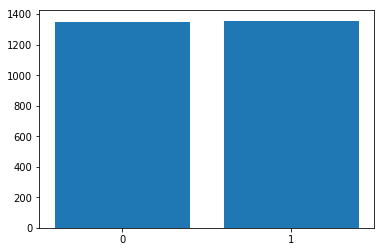

In [23]:
label = pd.DataFrame(label, columns=["val"])
labelx = [0, 1]
labelh = [label[label["val"] == 0].count()["val"], label[label["val"] == 1].count()["val"]]

plt.bar(x=labelx, height=labelh)
plt.xticks(labelx)

In [24]:
from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val=train_test_split(data,label,test_size=0.10,random_state=42, stratify=label)

X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_train = X_train / 255.0
X_val = X_val / 255.0

y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
class_num = y_val.shape[1]

print("X_train shape",X_train.shape)
print("X_test shape",X_val.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_val.shape)

X_train shape (2435, 64, 64, 3)
X_test shape (271, 64, 64, 3)
y_train shape (2435, 2)
y_test shape (271, 2)


In [ ]:
X_train = X_train[:150]
y_train = y_train[:150]

In [319]:
model = Sequential()
model.add(Conv2D(256, (3, 3), padding='same', input_shape=(64, 64, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
    
model.add(Conv2D(256, (3, 3), padding='same', input_shape=(64, 64, 3)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Flatten(input_shape=(64,64)))
# model.add(Dropout(0.2))

model.add(Dense(128))
model.add(Activation('relu'))
# model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(2))
model.add(Activation('softmax'))

epochs = 25
optimizer = 'adam'

model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

History = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=64)

Train on 150 samples, validate on 271 samples
Epoch 1/30
150/150 [==============================] - 30s 201ms/step - loss: 0.6679 - acc: 0.7067 - val_loss: 1.1006 - val_acc: 0.8007
Epoch 2/30
150/150 [==============================] - 18s 118ms/step - loss: 0.1550 - acc: 0.9333 - val_loss: 1.8937 - val_acc: 0.7159
Epoch 3/30
150/150 [==============================] - 18s 120ms/step - loss: 0.1112 - acc: 0.9733 - val_loss: 3.4999 - val_acc: 0.5867
Epoch 4/30
150/150 [==============================] - 17s 112ms/step - loss: 0.0456 - acc: 0.9800 - val_loss: 5.1814 - val_acc: 0.5461
Epoch 5/30
150/150 [==============================] - 17s 113ms/step - loss: 0.0204 - acc: 0.9933 - val_loss: 6.4667 - val_acc: 0.5203
Epoch 6/30
150/150 [==============================] - 24s 163ms/step - loss: 0.0142 - acc: 1.0000 - val_loss: 5.1469 - val_acc: 0.6089
Epoch 7/30
150/150 [==============================] - 34s 229ms/step - loss: 0.0241 - acc: 0.9933 - val_loss: 2.1420 - val_acc: 0.7528
Epoch 8/3

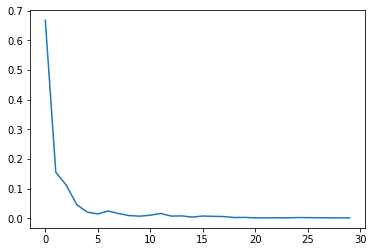

In [320]:
plt.plot(History.history['loss'])
plt.show()

# Caution

In [25]:
# model.save("model.h5")
from keras.models import load_model
model = load_model('model.h5')

In [26]:
pred = model.predict(X_val)

# Model evaluation
scores = model.evaluate(X_val, y_val, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))
print(scores)

Accuracy: 95.94%
[0.11766943211815015, 0.959409594095941]


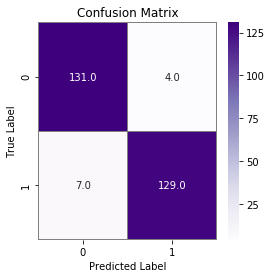

              precision    recall  f1-score   support

      normal       0.95      0.97      0.96       135
   pneumonia       0.97      0.95      0.96       136

   micro avg       0.96      0.96      0.96       271
   macro avg       0.96      0.96      0.96       271
weighted avg       0.96      0.96      0.96       271
 samples avg       0.96      0.96      0.96       271



In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_val.argmax(axis=1),pred.argmax(axis=1))

f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Purples",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

report = classification_report(y_val, np.around(pred), target_names=["normal", "pneumonia"])
print(report)

In [28]:
pred

array([[9.55930518e-05, 9.99904394e-01],
       [9.97325182e-01, 2.67483713e-03],
       [9.91797328e-01, 8.20269994e-03],
       [9.95642424e-01, 4.35763411e-03],
       [1.00000000e+00, 1.83125135e-15],
       [9.95987594e-01, 4.01245011e-03],
       [9.98976946e-01, 1.02313759e-03],
       [2.19554035e-03, 9.97804463e-01],
       [9.93342698e-01, 6.65731076e-03],
       [9.98915911e-01, 1.08412618e-03],
       [2.63531343e-03, 9.97364700e-01],
       [9.12573874e-01, 8.74260962e-02],
       [9.83029306e-01, 1.69706829e-02],
       [2.98051715e-01, 7.01948285e-01],
       [9.99989390e-01, 1.05544141e-05],
       [2.67774373e-01, 7.32225597e-01],
       [1.00899815e-04, 9.99899149e-01],
       [4.12804425e-01, 5.87195516e-01],
       [9.99517560e-01, 4.82486968e-04],
       [4.73717511e-01, 5.26282489e-01],
       [1.74022272e-01, 8.25977683e-01],
       [9.66542184e-01, 3.34578156e-02],
       [9.99974132e-01, 2.58442524e-05],
       [6.69986941e-03, 9.93300080e-01],
       [1.962512

In [29]:
testing_label = []
testing_data = []
testing_name = []

testing_dir = "dataset/val/"

for folder in os.listdir(testing_dir):        
    for index, file in enumerate(os.listdir(os.path.join(testing_dir, folder))):
        if file.endswith("jpg") | file.endswith("jpeg"):
            testing_name.append(os.path.join(testing_dir, folder, file))
            testing_label.append(label_inverse.index(folder))
            img = cv2.imread(os.path.join(testing_dir, folder, file))
            im = cv2.resize(img,IMG_SIZE)
#             im = im.reshape(64,64, 3)
            
            testing_data.append(im)

testing_label = np.array(testing_label)
testing_data = np.array(testing_data)

testing_data = testing_data.astype('float32')
testing_data = testing_data / 255.0

testing_label = np_utils.to_categorical(testing_label)

pred = model.predict(testing_data)

In [30]:
from PIL import ImageFont, ImageDraw, Image

df = pd.DataFrame()
df['file'] = pd.Series(testing_name)
df['true_label'] = pd.Series(testing_label.argmax(axis=1))
df['predicted_label'] = pd.Series(pred.argmax(axis=1))
df['prob'] = pd.Series(np.amax(pred, axis=1))

df

,file,true_label,predicted_label,prob
0,dataset/val/NORMAL/NORMAL2-IM-1431-0001.jpeg,0,0,0.999501
1,dataset/val/NORMAL/NORMAL2-IM-1440-0001.jpeg,0,0,0.983905
2,dataset/val/NORMAL/NORMAL2-IM-1427-0001.jpeg,0,0,0.991162
3,dataset/val/NORMAL/NORMAL2-IM-1437-0001.jpeg,0,0,0.923342
4,dataset/val/NORMAL/NORMAL2-IM-1430-0001.jpeg,0,0,0.988513
5,dataset/val/NORMAL/NORMAL2-IM-1438-0001.jpeg,0,0,0.987685
6,dataset/val/NORMAL/NORMAL2-IM-1442-0001.jpeg,0,0,0.979314
7,dataset/val/NORMAL/NORMAL2-IM-1436-0001.jpeg,0,0,0.909893
8,dataset/val/PNEUMONIA/person1952_bacteria_4883...,1,1,0.939193
9,dataset/val/PNEUMONIA/person1951_bacteria_4882...,1,1,0.934034


In [31]:
testing_series = pd.Series(pred.argmax(axis=1) == testing_label.argmax(axis=1))
print("Accuracy:", testing_series.value_counts()[True] / len(testing_series) * 100)

Accuracy: 100.0


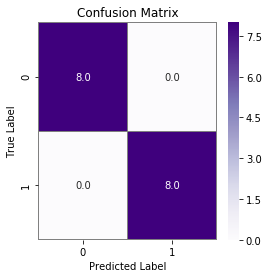

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         8

   micro avg       1.00      1.00      1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(testing_label.argmax(axis=1),pred.argmax(axis=1))

f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Purples",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

report = classification_report(testing_label.argmax(axis=1), pred.argmax(axis=1), labels=np.unique(pred.argmax(axis=1)))
print(report)

person1951_bacteria_4882.jpeg


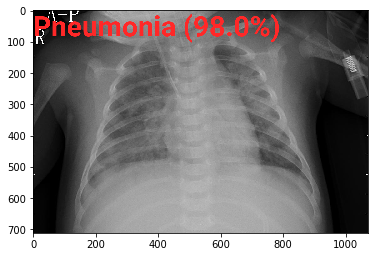

In [33]:
from PIL import ImageFont, ImageDraw, Image

directory = os.listdir("dataset/val/PNEUMONIA")
print(directory[1])

img_raw = cv2.imread("dataset/val/PNEUMONIA/" + directory[7])

img_predict = cv2.resize(img_raw,IMG_SIZE)
img_predict = img_predict.reshape(1,64,64, 3)

testing_data = np.array(img_predict)

testing_data = testing_data.astype('float32')
testing_data = testing_data / 255.0

# testing_label = np_utils.to_categorical(testing_label)

pred = model.predict(testing_data)
textPred = ""
if pred.argmax(axis=1) == 0:
    textPred = "Normal"
else:
    textPred = "Pneumonia"

# Convert to PIL Image
pil_im = Image.fromarray(img_raw)
draw = ImageDraw.Draw(pil_im)
# Choose a font
font = ImageFont.truetype("Roboto-Bold.ttf", 90)

# Draw the text
draw.text((0, 0), "{} ({}%)".format(textPred, float("%0.2f" % (np.amax(pred, axis=1)[0]))*100), font=font, fill=(40,40,255))

img = cv2.cvtColor(np.array(pil_im), cv2.COLOR_RGB2BGR)

plt.figure(figsize=(6, 6))
plt.imshow(img)

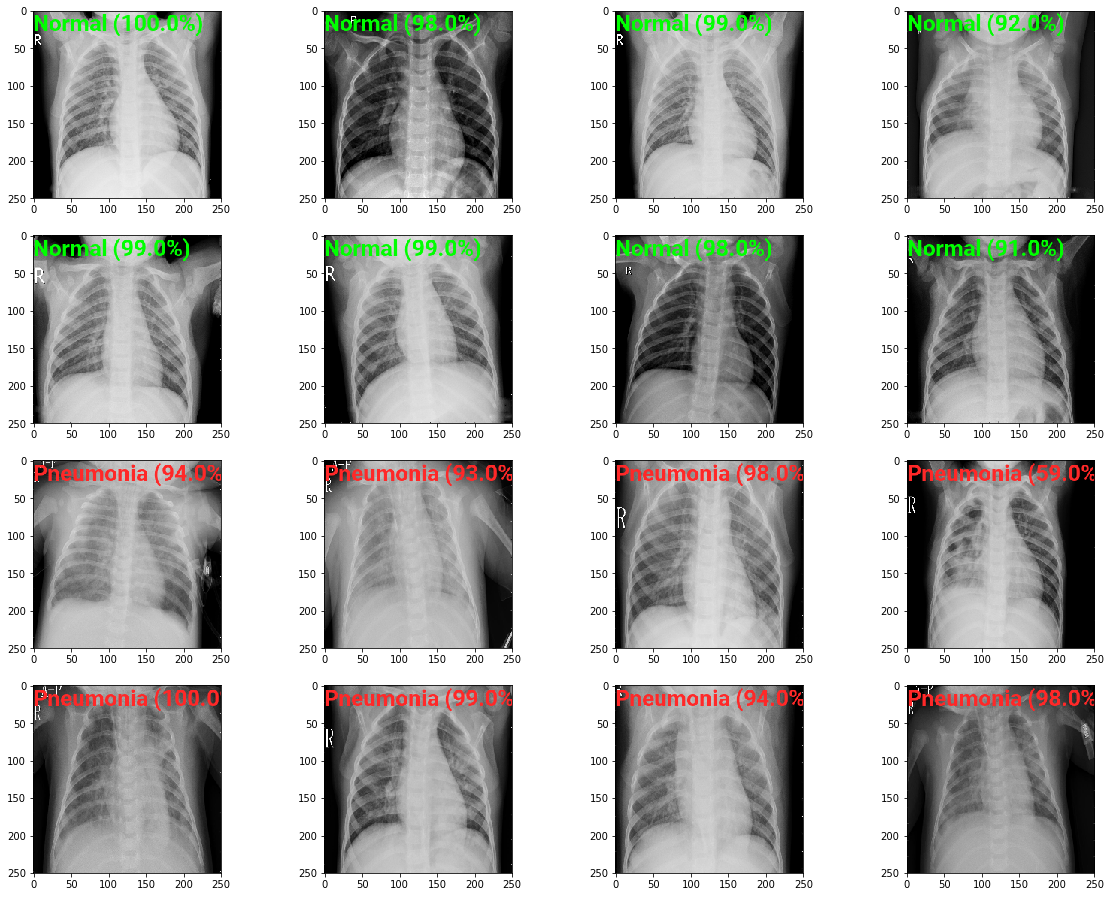

In [37]:
plt.figure(figsize=(20,20))
columns = 4
for i, data in df.iterrows():
    plt.subplot(len(df) / columns + 1, columns, i + 1)
    
    img_raw = cv2.imread(data["file"])
    
    img_predict = cv2.resize(img_raw,IMG_SIZE)
    img_predict_display = cv2.resize(img_raw,(250,250))
    img_predict = img_predict.reshape(1,64,64, 3)

    testing_data = np.array(img_predict)

    testing_data = testing_data.astype('float32')
    testing_data = testing_data / 255.0

    # testing_label = np_utils.to_categorical(testing_label)

    pred = model.predict(testing_data)
    textPred = ""
    fillColor = ()
    if pred.argmax(axis=1) == 0:
        textPred = "Normal"
        fillColor = (0,255,0)
    else:
        textPred = "Pneumonia"
        fillColor = (40,40,255)

    # Convert to PIL Image
    pil_im = Image.fromarray(img_predict_display)
    draw = ImageDraw.Draw(pil_im)
    # Choose a font
    font = ImageFont.truetype("Roboto-Bold.ttf", 30)

    # Draw the text
    draw.text((0, 0), "{} ({}%)".format(textPred, float("%0.2f" % (np.amax(pred, axis=1)[0]))*100), font=font, fill=fillColor)

    img = cv2.cvtColor(np.array(pil_im), cv2.COLOR_RGB2BGR)
    plt.imshow(img)